**Loading and Intiating a variable with our Dataset**

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/train.csv',encoding='latin-1')

train_df

,label,tweet
0,0,Sooo SAD I will miss you here in San Diego!!!
1,0,my boss is bullying me...
2,0,what interview! leave me alone
3,0,"Sons of ****, why couldn`t they put them on t..."
4,0,My Sharpie is running DANGERously low on ink
...,...,...
16358,1,morning twit-friends! welcome to my new followers
16359,1,So I get up early and I feel good about the da...
16360,1,enjoy ur night
16361,1,Yay good for both of you. Enjoy the break - y...


**Counting the number of Postive and Negative Tweets from our CSV file Dataset**

In [ ]:
train_df['label'].value_counts()


1    8582
0    7781
Name: label, dtype: int64

**Now we will use glove lib which consists of pre-embdeded words so we dont have to embedded them.**

In [ ]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2022-11-18 13:15:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip         10%[=>                  ]  90.40M  5.00MB/s    eta 2m 5s  ^C


In [ ]:
!unzip glove.6B.zip

^C


In [ ]:
import numpy as np

words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words, 'glove.6B.50d.txt')
words

FileNotFoundError: ignored

In [ ]:
len(words)

400000

**Now we will download some important and commonly used word or text libraries so we can use them later.**

In [ ]:
import nltk

nltk.download('wordnet ')

[nltk_data] Error loading wordnet : Package 'wordnet ' not found in
[nltk_data]     index


False

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Now we will user tokenizer so we can store our words from a sentence into word format in our array or list. As you can see below.**

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

tokenizer.tokenize('@user when a father is dysfunctional and is')

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

**We will aslo use word lemmatizer which basically does is convert our words **to the most commomly used word format you can see from the example below as **bold text**
**'foot'  is the most commonly used word instead of feet so it will convert** **the word 'feet' to 'foot' so detection of our word sentiment becomes easier.**

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

#lemmatizer.lemmatize('feet')

def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]

  return useful_tokens

message_to_token_list('@user feet a fathers is dysfunctional and is')

[]

**Converting Our words/sentences into vectors so we can train our model and so also we can use tokenizer and lemmatizer on them**

In [ ]:
def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vectors.append(token_vector)
  
  return np.array(vectors, dtype=float)

In [ ]:
message_to_word_vectors('@user when a father is dysfunctional and is').shape

(0,)

In [ ]:
train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(11454, 2454, 2455)

In [ ]:
test_df

,label,tweet
13908,0,Getting to play golf with our kickin` Leadersh...
13909,0,so i feel like **** for saying HAPPY BELATED ...
13910,0,Y AM I STILL AWAKE!!!! SMH.... THIS SUCKS!!!
13911,1,HAHA I LOVE THE WAY U PUT IT 'He lifts our fe...
13912,0,healthy food is NOT helping my hangover
...,...,...
16358,1,Happy Mothers Day. Take ur mothers into a spec...
16359,0,is ur boyfriend better than mine? hell no!
16360,1,I dedicated today to Mothers Day videos becaus...
16361,0,i have no idea what im doing and i am complete...


In [ ]:
def df_to_X_y(dff):
  y = dff['label'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['tweet']:
    message_as_vector_seq = message_to_word_vectors(message)
    
    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 50))

    all_word_vector_sequences.append(message_as_vector_seq)
  
  return all_word_vector_sequences, y

**Calculating average word size in a sentence or shape of the array or matrix so we can fix them and dont exceed it.**
**After that we will split our dataset into train and test portions and then design our model and run the training.**

In [ ]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

16363 1


In [ ]:
print(len(X_train), len(X_train[2]))

11454 26


(array([    0.,     0.,     0.,     0.,     0., 16363.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

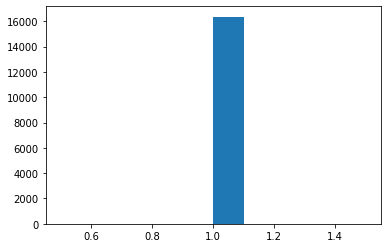

In [ ]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [ ]:
pd.Series(sequence_lengths).describe()

count    11454.000000
mean        13.446831
std          6.945165
min          1.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         34.000000
dtype: float64

In [ ]:
from copy import deepcopy

def pad_X(X, desired_sequence_length=57):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    
    pad = np.zeros(shape=(sequence_length_difference, 50))

    X_copy[i] = np.concatenate([x, pad])
  
  return np.array(X_copy).astype(float)

In [ ]:
X_train = pad_X(X_train)

X_train.shape

(11454, 57, 50)

In [ ]:
y_train.shape

(11454,)

In [ ]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((2454, 57, 50), (2454,))

In [ ]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((2455, 57, 50), (2455,))

In [1]:
#Our Model using LSTM
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(57, 50)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 57, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 57, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 57, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 57, 64)            0         
                                                                 
 flatten (Flatten)           (None, 3648)              0

In [ ]:
#Saving our Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('/content/drive/MyDrive/models/tw.h', save_best_only=True)
#Hyper-parameters of our model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy', AUC(name='auc')])

In [ ]:
frequencies = pd.value_counts(train_df['label'])

frequencies

1    6031
0    5423
Name: label, dtype: int64

In [ ]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
weights

{0: 2.1121150654619214, 1: 1.8991875310893716}

In [ ]:
#Fitiing our training our model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], class_weight=weights)

Epoch 1/20
357/358 [============================>.] - ETA: 0s - loss: 1.1620 - accuracy: 0.6896 - auc: 0.7629

358/358 [==============================] - 32s 60ms/step - loss: 1.1613 - accuracy: 0.6899 - auc: 0.7632 - val_loss: 0.5223 - val_accuracy: 0.7535 - val_auc: 0.8302
Epoch 2/20
355/358 [============================>.] - ETA: 0s - loss: 0.9732 - accuracy: 0.7695 - auc: 0.8464

358/358 [==============================] - 17s 49ms/step - loss: 0.9724 - accuracy: 0.7694 - auc: 0.8467 - val_loss: 0.4800 - val_accuracy: 0.7718 - val_auc: 0.8549
Epoch 3/20
355/358 [============================>.] - ETA: 0s - loss: 0.9248 - accuracy: 0.7858 - auc: 0.8632

358/358 [==============================] - 20s 56ms/step - loss: 0.9246 - accuracy: 0.7858 - auc: 0.8633 - val_loss: 0.4587 - val_accuracy: 0.7848 - val_auc: 0.8653
Epoch 4/20
355/358 [============================>.] - ETA: 0s - loss: 0.8931 - accuracy: 0.7927 - auc: 0.8731

358/358 [==============================] - 18s 49ms/step - loss: 0.8940 - accuracy: 0.7924 - auc: 0.8729 - val_loss: 0.4475 - val_accuracy: 0.7930 - val_auc: 0.8730
Epoch 5/20
355/358 [============================>.] - ETA: 0s - loss: 0.8704 - accuracy: 0.7982 - auc: 0.8800

358/358 [==============================] - 18s 49ms/step - loss: 0.8695 - accuracy: 0.7983 - auc: 0.8802 - val_loss: 0.4387 - val_accuracy: 0.7991 - val_auc: 0.8794
Epoch 6/20
358/358 [==============================] - ETA: 0s - loss: 0.8546 - accuracy: 0.8011 - auc: 0.8848

358/358 [==============================] - 18s 51ms/step - loss: 0.8546 - accuracy: 0.8011 - auc: 0.8848 - val_loss: 0.4270 - val_accuracy: 0.8048 - val_auc: 0.8849
Epoch 7/20
358/358 [==============================] - ETA: 0s - loss: 0.8401 - accuracy: 0.8049 - auc: 0.8887

358/358 [==============================] - 18s 50ms/step - loss: 0.8401 - accuracy: 0.8049 - auc: 0.8887 - val_loss: 0.4205 - val_accuracy: 0.8097 - val_auc: 0.8885
Epoch 8/20
357/358 [============================>.] - ETA: 0s - loss: 0.8121 - accuracy: 0.8166 - auc: 0.8964

358/358 [==============================] - 17s 49ms/step - loss: 0.8125 - accuracy: 0.8166 - auc: 0.8963 - val_loss: 0.4147 - val_accuracy: 0.8142 - val_auc: 0.8932
Epoch 9/20
357/358 [============================>.] - ETA: 0s - loss: 0.7998 - accuracy: 0.8204 - auc: 0.8993

358/358 [==============================] - 19s 53ms/step - loss: 0.7993 - accuracy: 0.8204 - auc: 0.8995 - val_loss: 0.4126 - val_accuracy: 0.8183 - val_auc: 0.8959
Epoch 10/20
357/358 [============================>.] - ETA: 0s - loss: 0.7792 - accuracy: 0.8269 - auc: 0.9053

358/358 [==============================] - 17s 47ms/step - loss: 0.7801 - accuracy: 0.8266 - auc: 0.9050 - val_loss: 0.4052 - val_accuracy: 0.8248 - val_auc: 0.8997
Epoch 11/20
355/358 [============================>.] - ETA: 0s - loss: 0.7579 - accuracy: 0.8340 - auc: 0.9103

358/358 [==============================] - 18s 50ms/step - loss: 0.7584 - accuracy: 0.8339 - auc: 0.9102 - val_loss: 0.3952 - val_accuracy: 0.8236 - val_auc: 0.9025
Epoch 12/20
358/358 [==============================] - 6s 18ms/step - loss: 0.7456 - accuracy: 0.8338 - auc: 0.9132 - val_loss: 0.3953 - val_accuracy: 0.8280 - val_auc: 0.9055
Epoch 13/20
358/358 [==============================] - ETA: 0s - loss: 0.7270 - accuracy: 0.8407 - auc: 0.9175

358/358 [==============================] - 18s 49ms/step - loss: 0.7270 - accuracy: 0.8407 - auc: 0.9175 - val_loss: 0.3858 - val_accuracy: 0.8301 - val_auc: 0.9078
Epoch 14/20
358/358 [==============================] - 5s 15ms/step - loss: 0.7119 - accuracy: 0.8456 - auc: 0.9210 - val_loss: 0.3962 - val_accuracy: 0.8321 - val_auc: 0.9103
Epoch 15/20
358/358 [==============================] - ETA: 0s - loss: 0.7070 - accuracy: 0.8476 - auc: 0.9221

358/358 [==============================] - 18s 49ms/step - loss: 0.7070 - accuracy: 0.8476 - auc: 0.9221 - val_loss: 0.3826 - val_accuracy: 0.8337 - val_auc: 0.9114
Epoch 16/20
356/358 [============================>.] - ETA: 0s - loss: 0.7040 - accuracy: 0.8473 - auc: 0.9229

358/358 [==============================] - 19s 54ms/step - loss: 0.7029 - accuracy: 0.8479 - auc: 0.9232 - val_loss: 0.3801 - val_accuracy: 0.8362 - val_auc: 0.9113
Epoch 17/20
355/358 [============================>.] - ETA: 0s - loss: 0.6788 - accuracy: 0.8569 - auc: 0.9282

358/358 [==============================] - 18s 50ms/step - loss: 0.6798 - accuracy: 0.8567 - auc: 0.9280 - val_loss: 0.3758 - val_accuracy: 0.8358 - val_auc: 0.9145
Epoch 18/20
358/358 [==============================] - 5s 15ms/step - loss: 0.6708 - accuracy: 0.8577 - auc: 0.9300 - val_loss: 0.3770 - val_accuracy: 0.8370 - val_auc: 0.9161
Epoch 19/20
358/358 [==============================] - ETA: 0s - loss: 0.6560 - accuracy: 0.8624 - auc: 0.9332

358/358 [==============================] - 17s 49ms/step - loss: 0.6560 - accuracy: 0.8624 - auc: 0.9332 - val_loss: 0.3691 - val_accuracy: 0.8411 - val_auc: 0.9158
Epoch 20/20
358/358 [==============================] - 6s 18ms/step - loss: 0.6430 - accuracy: 0.8668 - auc: 0.9357 - val_loss: 0.3737 - val_accuracy: 0.8403 - val_auc: 0.9177


**Loading our model for prediction of our tweets.**

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/MyDrive/models/tw.h')

**Finding out loss and accuracy of our model.**

In [ ]:
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

77/77 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1147
           1       0.88      0.81      0.85      1308

    accuracy                           0.84      2455
   macro avg       0.84      0.84      0.84      2455
weighted avg       0.84      0.84      0.84      2455



**Give our model an example to predict the output.**

In [ ]:
a='the food was good not bad at all '
b=message_to_token_list(a)
print(b)
c=message_to_word_vectors(a, word_dict=words)
print(c)
l=1
#y = d.to_numpy().astype(int)

all_word_vector_sequences = []

if c.shape[0] == 0:
  c = np.zeros(shape=(1, 50))
  
all_word_vector_sequences.append(c)

d=pad_X(all_word_vector_sequences, desired_sequence_length=57)

print(best_model.predict(d)) 

t_predictions = (best_model.predict(d) > 0.5).astype(int)


print('The Sentiment of this tweet is: ',t_predictions)

[]
[]
1/1 [==============================] - 0s 20ms/step
[[0.49334735]]
1/1 [==============================] - 0s 23ms/step
The Sentiment of this tweet is:  [[0]]


In [ ]:
#Use this function if you want remove unneeded symbols
import re

def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

  return text

# applying the text cleaning function on tweets
df['SentimentText'] = df['SentimentText'].apply(text_cleaning)
df.head(10)


NameError: ignored